# Set up

In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# Load training data

In [2]:
df = pd.read_pickle('train_set.pkl')

# Sentiment Analysis

## TextBlob

In [3]:
from textblob import TextBlob

In [4]:
tb_claims = pd.DataFrame(df, columns=['claim', 'label'])
tb_claims

,claim,label
9389,While arguing over President Reagan’s 1981 tax...,1
1861,"Recently Rick Scott ""closed 30 women’s health ...",0
11035,Says Target installed urinals in a women’s bat...,0
12221,"Says ""combined doses of vaccines"" have never b...",0
11354,: The AMBER Alert system has been discontinu...,0
...,...,...
2910,Health insurance costs for Floridians are up 3...,1
6096,"A photograph captures Harriet Tubman as a ""Gun...",0
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0
5414,"""The board of a nonprofit organization on whic...",1


In [5]:
for index, row in tb_claims.iterrows():
    claim = TextBlob(row['claim'])
    tb_claims.at[index,'subjectivity'] = claim.sentiment.subjectivity
    tb_claims.at[index,'polarity'] = claim.sentiment.polarity

In [6]:
tb_claims

,claim,label,subjectivity,polarity
9389,While arguing over President Reagan’s 1981 tax...,1,0.525568,0.23267
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,0.175000,-0.05000
11035,Says Target installed urinals in a women’s bat...,0,0.000000,0.00000
12221,"Says ""combined doses of vaccines"" have never b...",0,0.000000,0.00000
11354,: The AMBER Alert system has been discontinu...,0,0.375000,-0.12500
...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,1,0.500000,0.50000
6096,"A photograph captures Harriet Tubman as a ""Gun...",0,0.000000,0.00000
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0,0.000000,0.00000
5414,"""The board of a nonprofit organization on whic...",1,0.950000,0.55000


In [7]:
tb_false = tb_claims.loc[df['label'] == 0]
tb_partly = tb_claims.loc[df['label'] == 1]
tb_true = tb_claims.loc[df['label'] == 2]

In [8]:
avg_false_subj = tb_false['subjectivity'].mean()
avg_partly_subj = tb_partly['subjectivity'].mean()
avg_true_subj = tb_true['subjectivity'].mean()

In [9]:
print("Average subjectivity of false claims:", avg_false_subj)
print("Average subjectivity of partly true claims:", avg_partly_subj)
print("Average subjectivity of true claims:", avg_true_subj)

Average subjectivity of false claims: 0.2716423270622645
Average subjectivity of partly true claims: 0.2858796229627493
Average subjectivity of true claims: 0.2676526441568942


In [10]:
avg_false_polar = tb_false['polarity'].mean()
avg_partly_polar = tb_partly['polarity'].mean()
avg_true_polar = tb_true['polarity'].mean()

In [11]:
print("Average polarity of false claims:", avg_false_polar)
print("Average polarity of partly true claims:", avg_partly_polar)
print("Average polarity of true claims:", avg_true_polar)

Average polarity of false claims: 0.028367314136061635
Average polarity of partly true claims: 0.045805593927659614
Average polarity of true claims: 0.05081061865482199


In [12]:
tb_false_subj = tb_false['subjectivity']
tb_partly_subj = tb_partly['subjectivity']
tb_true_subj = tb_true['subjectivity']

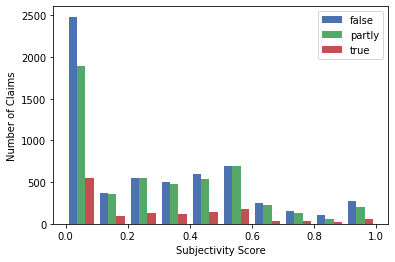

In [13]:
plt.hist([tb_false_subj, tb_partly_subj, tb_true_subj], label=['false', 'partly', 'true'])
plt.legend(loc='upper right')
plt.xlabel('Subjectivity Score')
plt.ylabel('Number of Claims')
plt.show()

In [14]:
tb_false_polar = tb_false['polarity']
tb_partly_polar = tb_partly['polarity']
tb_true_polar = tb_true['polarity']

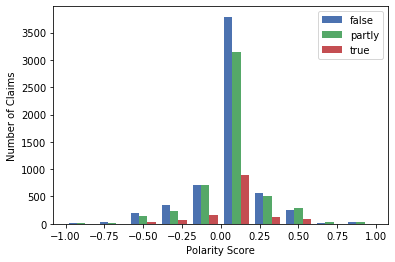

In [15]:
plt.hist([tb_false_polar, tb_partly_polar, tb_true_polar], label=['false', 'partly', 'true'])
plt.legend(loc='upper right')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Claims')
plt.show()

## VADER

In [16]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alice/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

In [18]:
sid.polarity_scores("That was an awful movie")

{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.4588}

In [19]:
vd_claims = pd.DataFrame(df, columns=['claim', 'label'])
vd_claims

,claim,label
9389,While arguing over President Reagan’s 1981 tax...,1
1861,"Recently Rick Scott ""closed 30 women’s health ...",0
11035,Says Target installed urinals in a women’s bat...,0
12221,"Says ""combined doses of vaccines"" have never b...",0
11354,: The AMBER Alert system has been discontinu...,0
...,...,...
2910,Health insurance costs for Floridians are up 3...,1
6096,"A photograph captures Harriet Tubman as a ""Gun...",0
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0
5414,"""The board of a nonprofit organization on whic...",1


In [20]:
for index, row in vd_claims.iterrows():
    claim = sid.polarity_scores(row['claim'])
    vd_claims.at[index,'negative'] = claim['neg']
    vd_claims.at[index,'neutral'] = claim['neu']
    vd_claims.at[index,'positive'] = claim['pos']
    vd_claims.at[index,'compound'] = claim['compound']

In [21]:
vd_claims

,claim,label,negative,neutral,positive,compound
9389,While arguing over President Reagan’s 1981 tax...,1,0.077,0.771,0.152,0.8020
1861,"Recently Rick Scott ""closed 30 women’s health ...",0,0.000,0.775,0.225,0.4939
11035,Says Target installed urinals in a women’s bat...,0,0.000,1.000,0.000,0.0000
12221,"Says ""combined doses of vaccines"" have never b...",0,0.000,1.000,0.000,0.0000
11354,: The AMBER Alert system has been discontinu...,0,0.000,0.845,0.155,0.2960
...,...,...,...,...,...,...
2910,Health insurance costs for Floridians are up 3...,1,0.000,1.000,0.000,0.0000
6096,"A photograph captures Harriet Tubman as a ""Gun...",0,0.000,1.000,0.000,0.0000
10446,"ISIS leader Abu Bakr al Baghdadi was ""released...",0,0.000,1.000,0.000,0.0000
5414,"""The board of a nonprofit organization on whic...",1,0.087,0.817,0.096,0.0516


In [22]:
vd_false = vd_claims.loc[vd_claims['label'] == 0]
vd_partly = vd_claims.loc[vd_claims['label'] == 1]
vd_true = vd_claims.loc[vd_claims['label'] == 2]

In [23]:
vd_false_comp = vd_false['compound']
vd_partly_comp = vd_partly['compound']
vd_true_comp = vd_true['compound']

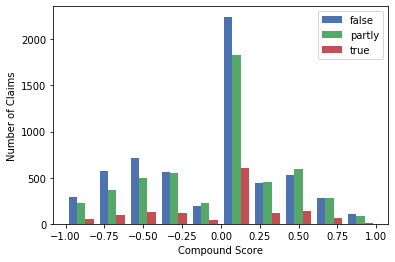

In [24]:
plt.hist([vd_false_comp, vd_partly_comp, vd_true_comp], label=['false', 'partly', 'true'])
plt.legend(loc='upper right')
plt.xlabel('Compound Score')
plt.ylabel('Number of Claims')
plt.show()